In [1]:
import pandas as pd
from hotelling.plots import control_chart, control_stats, univariate_control_chart

# Multivariate sample

data from Nola D. Tracy, John C. Young & Robert L. Mason (1992) Multivariate Control Charts for individual Observations, Journal or Quality Technology, 24:2, 88-95, DOI:10.1080/00224065.1992.12015232

In [2]:
y = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        "impurities": [
            14.92,
            16.90,
            17.38,
            16.90,
            16.92,
            16.71,
            17.07,
            16.93,
            16.71,
            16.88,
            16.73,
            17.07,
            17.60,
            16.90,
        ],
        "temp": [
            85.77,
            83.77,
            84.46,
            86.27,
            85.23,
            83.81,
            86.08,
            85.85,
            85.73,
            86.27,
            83.46,
            85.81,
            85.92,
            84.23,
        ],
        "concentration": [
            42.26,
            43.44,
            42.74,
            43.60,
            43.18,
            43.72,
            43.33,
            43.41,
            43.28,
            42.59,
            44.00,
            42.78,
            43.11,
            43.48,
        ],
    }
)

y.set_index("id", inplace=True)

In [3]:
help(control_chart)

Help on function control_chart in module hotelling.plots:

control_chart(x, phase=1, alpha=0.001, x_bar=None, s=None, legend_right=False)
    control_chart
    
    Hotellilng Control Chart based on Q / T^2
    
    :param x: pandas dataframe, uni or multivariate
    :param phase: 1 or 2 - phase 1 is within initial sample, phase 2 is measuring implemented control
    :param alpha: significance level - used to calculate control lines at α/2 and 1-α/2
    :param x_bar: sample mean
    :param s: sample covariance
    :param legend_right: default to 'left', can specify 'right'
    :return: matplotlib ax



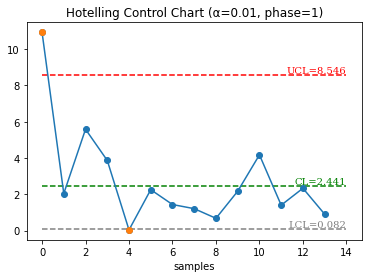

In [4]:
ax = control_chart(y, alpha=0.01, legend_right=True);

At alpha = 0.01, it appears sample 1 and sample 4 are out of control. We investigate the individual variables, to see if we can learn more about this.

In [5]:
help(univariate_control_chart)

Help on function univariate_control_chart in module hotelling.plots:

univariate_control_chart(x, var=None, sigma=3, legend_right=False)
    univariate_control_chart
    
    
    :param x: pandas dataframe, uni or multivariate
    :param var: optional, variable to plot (default to all)
    :param sigma: default to 3 sigma from mean for upper and lower control lines
    :param legend_right: default to 'left', can specify 'right'
    :return: returns matplotlib figure



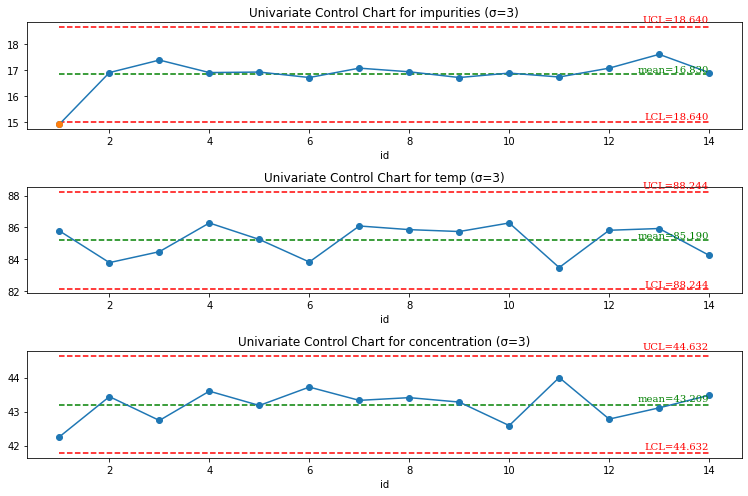

In [6]:
fig = univariate_control_chart(y, legend_right=True);

From the above chart, it looks like impurities might be out of control for sample id 1. Since we see this out of control at both the Hotelling control chart and univariate control chart, we will remove the first observation.

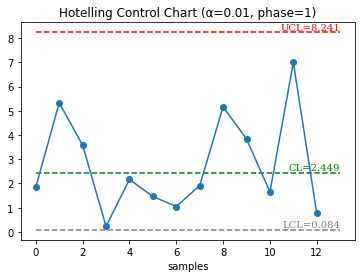

In [7]:
y_sub = y[1:]
control_chart(y_sub, alpha=0.01, legend_right=True);

This looks better, and now, sample 4 that was out of control is now in control (sample 3). We could save the mean vector and the covariance matrix for a phase 2 evaluation of new samples.

In [8]:
x_bar, s = control_stats(y_sub)

In [9]:
x_bar

impurities       16.976923
temp             85.145385
concentration    43.281538
dtype: float64

In [10]:
s

,impurities,temp,concentration
impurities,0.067006,0.076218,-0.053878
temp,0.076218,1.092777,-0.215359
concentration,-0.053878,-0.215359,0.162997


Assuming we had a new sample set (here we will reuse y), we call control_chart with phase = 2:

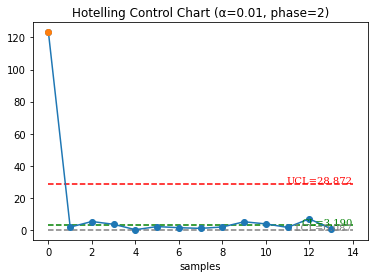

In [11]:
control_chart(y, alpha=0.01, phase=2, x_bar=x_bar, s=s, legend_right=True);

By calibrating our phase 1 to exclude our "suspect" sample, the control chart is now even more sensitive to out of control values.